In [1]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Q1: Read in data

In [2]:
gold = pd.read_csv('gold.txt', '\t', header=None, names=['url', 'category'])
gold.columns.values

array(['url', 'category'], dtype=object)

In [3]:
labels = pd.read_csv('labels.txt', '\t', header = None, names=['turk', 'url', 'category'])
labels.columns.values

array(['turk', 'url', 'category'], dtype=object)

In [4]:
labels = labels.drop_duplicates()

# Q2: Split into two DataFrames 

In [5]:
goldURLs = gold['url'].values

labels_on_gold = labels[labels['url'].map(lambda x: x in goldURLs)]

labels_unknown = labels[labels['url'].map(lambda x: x not in goldURLs)]

# Q3: Compute accuracies of turks

In [6]:
rater_check_total = gold.merge(labels, left_on = "url", right_on ="url", suffixes = ["_g", "_l"])
mask = rater_check_total['category_g'] == rater_check_total['category_l']
rater_check_correct = rater_check_total[mask]
rater_correct = rater_check_correct.groupby('turk')['url'].count()
rater_total = rater_check_total.groupby('turk')['url'].count()

rater_goodness = DataFrame(rater_correct)
rater_goodness.columns = ['correct']
rater_goodness['total'] = rater_total

rater_goodness['accuracy'] = rater_goodness['correct'] / rater_goodness['total']

rater_goodness.iloc[:10]

,correct,total,accuracy
turk,,,
A112DVP1KG4QZU,1,1,1.000000
A1253FXHCZ9CWM,15,29,0.517241
A12CY1Q7XKJJDE,1,1,1.000000
A12RE8G66WTO8B,15,20,0.750000
A12Y1GTGIQDGRA,1,3,0.333333
A13CEW9JGDWGX1,1,1,1.000000
A13OE9GBRJ0S2U,3,4,0.750000
A14IQ4GLNWNPOJ,1,1,1.000000
A153PKAL7OAY36,107,148,0.722973


# Q4: Odds ratios

In [7]:
rater_goodness['odds'] = rater_goodness['accuracy'] / (1.001 - rater_goodness['accuracy'])

rater_goodness.iloc[:10]

,correct,total,accuracy,odds
turk,,,,
A112DVP1KG4QZU,1,1,1.000000,1000.000000
A1253FXHCZ9CWM,15,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1,1.000000,1000.000000
A12RE8G66WTO8B,15,20,0.750000,2.988048
A12Y1GTGIQDGRA,1,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,3,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1,1.000000,1000.000000
A153PKAL7OAY36,107,148,0.722973,2.600369


# Q5: Most accurate turks

In [8]:
rater_goodness[rater_goodness['total'] >= 20].sort_values('odds', ascending = False).iloc[:10]

,correct,total,accuracy,odds
turk,,,,
A2U0R4X38GUKZE,19,20,0.950000,18.627451
A22C0PJUBFJTI0,33,36,0.916667,10.869565
A23YQUBXZPKILZ,21,24,0.875000,6.944444
ATVALOQVDCMZW,88,103,0.854369,5.826657
A1HIXWH4OXT8S4,33,40,0.825000,4.687500
A3220HG1O83HQ4,18,22,0.818182,4.475385
A32W20KGQXS0LL,20,25,0.800000,3.980100
A20PWAB7G3HDHU,16,20,0.800000,3.980100
AJSJVK40F5HM6,22,28,0.785714,3.649635


# Q6: Rating counts versus acurracy

Text(0.5,1,'# of Ratings vs Accuracy')

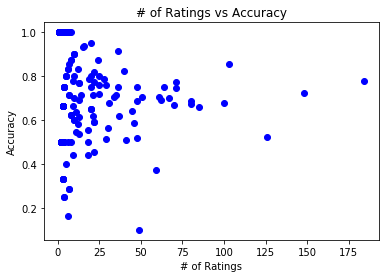

In [9]:
plot(rater_goodness['total'], rater_goodness['accuracy'], marker='o', color='blue', linestyle='None')
xlabel('# of Ratings')
ylabel('Accuracy')
title('# of Ratings vs Accuracy')

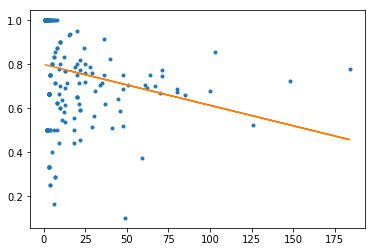

In [10]:
#No there is no relationship between the # of ratings and the accuracy of the turk
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
x = rater_goodness['total']
y = rater_goodness['accuracy']

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [11]:
np.corrcoef(x,y)

array([[ 1.        , -0.21503525],
       [-0.21503525,  1.        ]])

In [12]:
mean = rater_goodness['total'].mean()
spam = rater_goodness[rater_goodness['total'] > mean]
low = rater_goodness[rater_goodness['total'] < mean]
print "Median Accuracy of 'spammers':", spam['accuracy'].median()
print "Median Accuracy of sparse users:", low['accuracy'].median()

Median Accuracy of 'spammers': 0.70320528505
Median Accuracy of sparse users: 0.9


The relationship between a rater's accuracy and how many gold set URLs they have rated is weak, but slightly negative. The correlation coefficient is -0.22 and when taking a look the median accuracy of 'spammers' vs. sparse users, we can distinguish that spammers on average have a lower accuracy.

# Q7: Overall predicted odds

In [13]:
rater_goodness['quantile'] = pd.qcut(rater_goodness['total'], 4, labels = [1,2,3,4])

bestQuantileTurks = rater_goodness[rater_goodness['quantile'] == 4]

bestQuantileTurks.sort_values(by='total', ascending = False).iloc[:10]

,correct,total,accuracy,odds,quantile
turk,,,,,
A31OCN4MNHUQ6W,143,184,0.777174,3.472222,4
A153PKAL7OAY36,107,148,0.722973,2.600369,4
A2BTR0GQ5B5JI6,66,126,0.523810,1.097695,4
ATVALOQVDCMZW,88,103,0.854369,5.826657,4
AZSDW7JJL5VA7,68,100,0.680000,2.118380,4
A3GE97GX3OXJTW,56,85,0.658824,1.925391,4
A3JMQDTEKRE5X6,54,80,0.675000,2.070552,4
A2JP3HEL3J25AJ,55,80,0.687500,2.192982,4
APYV9Y0DFZFVP,53,71,0.746479,2.932876,4


In [14]:
def reliable75(turks):
    merge = bestQuantileTurks.merge(turks,
                                    left_on = 'turk',
                                    right_on = 'turk')
    
    return merge['odds'].prod()
    

overallOdds = labels_unknown.groupby(['url', 'category'])['turk'].agg(reliable75)

overallOdds.iloc[:10]

url                          category
http://0-101.net             G            2.297602
http://000.cc                G            1.485456
                             P            1.000000
http://0000.jp               G           10.266901
http://000relationships.com  G            2.750845
                             P            1.851852
                             R            1.000000
http://000vitamins.com       G            2.888087
http://000webhost.com        G           11.892639
http://003my.com             G            4.861524
Name: turk, dtype: float64

# Q8: Predicted categories

In [15]:
result_75 = overallOdds.unstack().fillna(0)
result_75['top odds'] = result_75.T.max()
result_75['top category'] = result_75.T.idxmax()


result_75.iloc[:10]

category,G,P,R,X,top odds,top category
url,,,,,,
http://0-101.net,2.297602,0.000000,0.00000,0.000000,2.297602,G
http://000.cc,1.485456,1.000000,0.00000,0.000000,1.485456,G
http://0000.jp,10.266901,0.000000,0.00000,0.000000,10.266901,G
http://000relationships.com,2.750845,1.851852,1.00000,0.000000,2.750845,G
http://000vitamins.com,2.888087,0.000000,0.00000,0.000000,2.888087,G
http://000webhost.com,11.892639,0.000000,0.00000,0.000000,11.892639,G
http://003my.com,4.861524,0.000000,0.00000,0.000000,4.861524,G
http://007absolutehardcore.com/early_cumshots/index.html,0.000000,3.346522,12.29045,293.252871,293.252871,X
http://007swz.cn,1.485456,0.000000,0.00000,0.000000,1.485456,G


# Q9: Predicted categories using more turks

In [16]:
best3QuantileTurks = rater_goodness[rater_goodness['quantile'] > 1]

best3QuantileTurks.iloc[:10]

,correct,total,accuracy,odds,quantile
turk,,,,,
A1253FXHCZ9CWM,15,29,0.517241,1.069214,4
A12RE8G66WTO8B,15,20,0.750000,2.988048,4
A12Y1GTGIQDGRA,1,3,0.333333,0.499251,2
A13OE9GBRJ0S2U,3,4,0.750000,2.988048,2
A153PKAL7OAY36,107,148,0.722973,2.600369,4
A17H2HKAZ7KJMQ,1,2,0.500000,0.998004,2
A17OE8HU0QCX21,7,8,0.875000,6.944444,3
A18HIFA78GUAG9,7,13,0.538462,1.164144,3
A19KO2JQ36WON3,1,4,0.250000,0.332889,2


In [17]:
def reliable25(turks):
    merge = best3QuantileTurks.merge(turks,
                                    left_on = 'turk',
                                    right_on = 'turk')
    
    return merge['odds'].prod()

result_25 = labels_unknown.groupby(['url', 'category'])['turk'].agg(reliable25).unstack().fillna(0)
result_25['top odds'] = result_25.T.max()
result_25['top category'] = result_25.T.idxmax()

result_25.iloc[:10]

category,G,P,R,X,top odds,top category
url,,,,,,
http://0-101.net,2.297602e+00,0.000000,0.000000,0.000000,2.297602e+00,G
http://000.cc,2.218192e+03,0.998004,0.000000,0.000000,2.218192e+03,G
http://0000.jp,2.847963e+07,0.000000,0.000000,0.000000,2.847963e+07,G
http://000relationships.com,1.852605e+07,1.851852,0.332889,0.000000,1.852605e+07,G
http://000vitamins.com,5.343559e+00,0.000000,0.000000,0.000000,5.343559e+00,G
http://000webhost.com,1.186890e+07,0.000000,0.000000,0.000000,1.186890e+07,G
http://003my.com,4.861524e+00,0.000000,0.000000,0.000000,4.861524e+00,G
http://007absolutehardcore.com/early_cumshots/index.html,0.000000e+00,3.346522,12.290450,584.751488,5.847515e+02,X
http://007swz.cn,1.482491e+00,0.000000,0.000000,0.000000,1.482491e+00,G


In [18]:
final = result_75.merge(result_25,
                       left_on = 'url',
                       right_on = 'url',
                       suffixes = ['_75', '_25']).groupby(['top category_75',
                                                        'top category_25'])['top category_75'].count().unstack()

final

top category_25,G,P,R,X
top category_75,,,,
G,8301,556,168,229
P,234,378,62,29
R,29,40,130,24
X,24,7,23,473


It seems like the most errors are at the intersection of categories 'P' and 'G'.